In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import os
import time
import copy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from torchsummary import summary

os.environ["KERAS_BACKEND"] = "torch"
import keras_core as keras

Using PyTorch backend.


# The Perceptron and beyond

In this section, we consider a regression task where the underlying data generation process is as follows:
$$ y = - \sin{(0.8 * x)}$$

Note that in this example there is no noise in the data, a case that you will rarely encounter in practice.

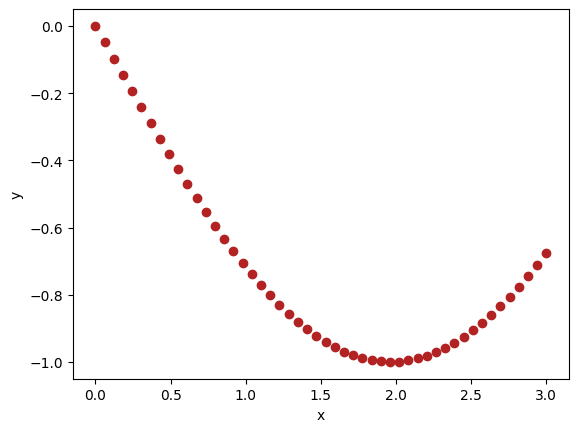

In [ ]:
# Defining our dataset

x_train = torch.linspace(0, 3, 50)
y_train = - torch.sin(0.8*x_train)

# Plotting the dataset

plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x_train, y_train, color= "firebrick")
plt.show()

The following function can be used to instantiate the perceptron

In [ ]:
def perceptron(input_shape= [1], units= 1, activation= None):
    model = keras.Sequential(
        [
            keras.layers.Input(shape= input_shape),
            keras.layers.Dense(units= units, activation= activation)
        ]
    )
    return model

linear_model = perceptron()

# You can vizualize a summary of your model by commenting out the following line.
# Here it is an affine function in dimension 1, thus having two parameters.

linear_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ dense (Dense)                      │ (None, 1)                     │           2 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

To fit a model in keras, one must first compile it, that is specify the loss and optimizer. Here they are respectively chosen as the mean squared error and gradient descent. Observe that the batch size is the same as the size of the training dataset, resulting in batch gradient descent.

You can play with the learning rate and number of epochs to understand how the training algorithm behaves.

Epoch 1/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.0506
Epoch 2/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2629
Epoch 3/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4627
Epoch 4/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2246
Epoch 5/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1467
Epoch 6/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1157
Epoch 7/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0993
Epoch 8/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0881
Epoch 9/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0795
Epoch 10/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0725
Epoch 11/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0666
Epoch 12/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0617
Epoch 13/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0575
Epoch 14/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0540
Epoch 15/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0511
Epoch 16/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

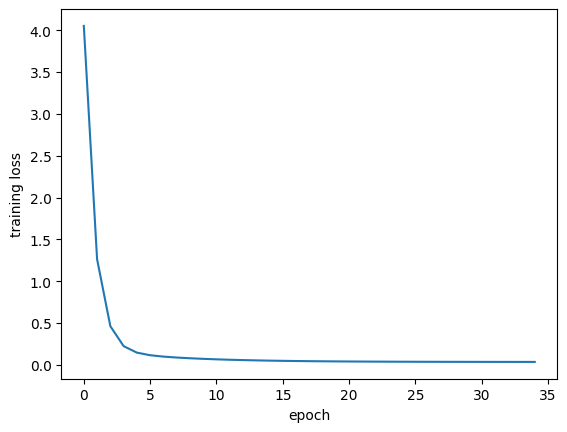

In [ ]:
linear_model.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.SGD(learning_rate= 0.2)
)
history = linear_model.fit(x_train, y_train, epochs= 35, batch_size= 50)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(history.history['loss'])
plt.show()

Having trained the model, we can now use it in prediction.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


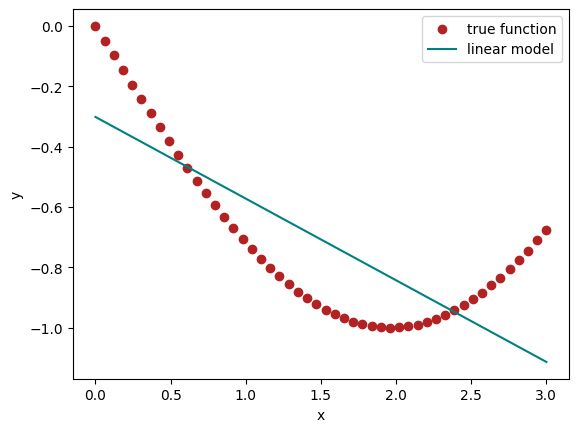

In [ ]:
y_pred_linear = linear_model.predict(x_train)

plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x_train, y_train, color='firebrick', label= 'true function')
plt.plot(x_train, y_pred_linear, color= 'teal', label= 'linear model')
plt.legend()
plt.show()

Beyond this simple perceptron, we now consider a 2-layers neural network model.

In [ ]:
def neural_net_2layers(input_shape= [1], units= 16, activation= 'sigmoid'):
    model = keras.Sequential(
        [
            keras.layers.Input(shape= input_shape),
            keras.layers.Dense(units= units, activation= activation),
            keras.layers.Dense(units= 1)
        ]
    )
    return model

You can train the model, and play with the hyperparameters to answer the questions.

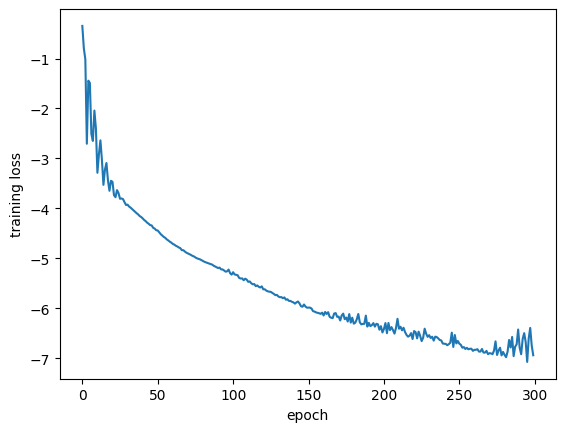

In [ ]:
net = neural_net_2layers(units= 10)

net.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.Adam(learning_rate= 0.1)
)

history = net.fit(x_train, y_train, epochs= 300, batch_size= 25, verbose= 0)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(np.log(history.history['loss']))
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


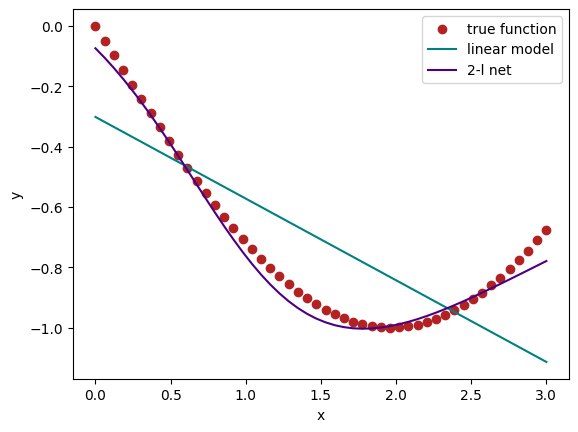

In [ ]:
y_pred_2l = net.predict(x_train)

plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x_train, y_train, color='firebrick', label = 'true function')
plt.plot(x_train, y_pred_linear, color= 'teal', label = 'linear model')
plt.plot(x_train, y_pred_2l, color= 'indigo', label = '2-l net')
plt.legend()
plt.show()

# In the wild jungle of training algorithms

## Small model

We first start by defining a simple dataset based on a modified cosine surface. This will allows us to test small models, and in particular 2nd order optimization algorithms. While <tt>keras</tt> is high-level deep learning library, we will dive into the depths of <tt>pytorch</tt> to have more control over the optimization schemes.

/Users/jeffeehsiung/Desktop/Toledo/artificial neural netowrk and deep learning/Artificial_Nerual_Networks_Exo


/usr/local/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


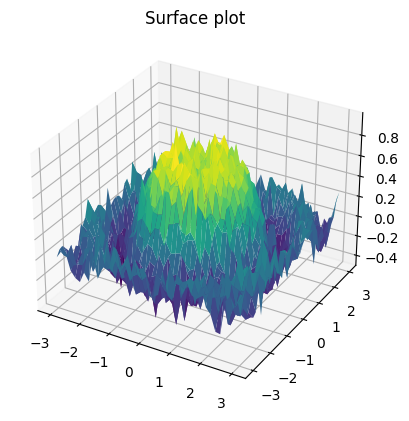

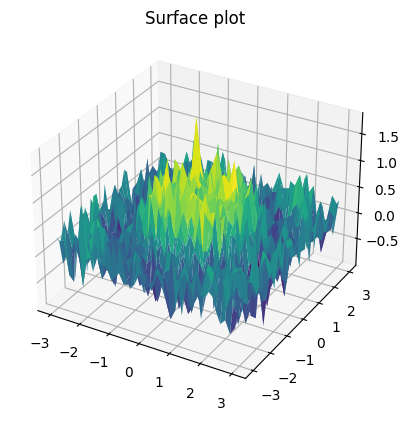

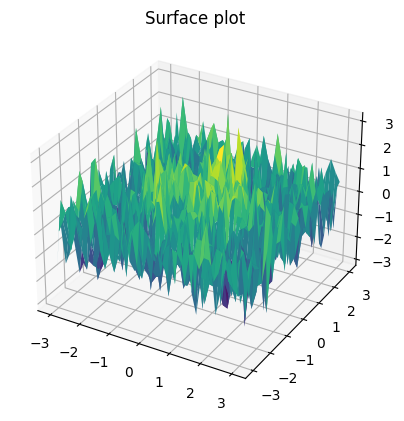

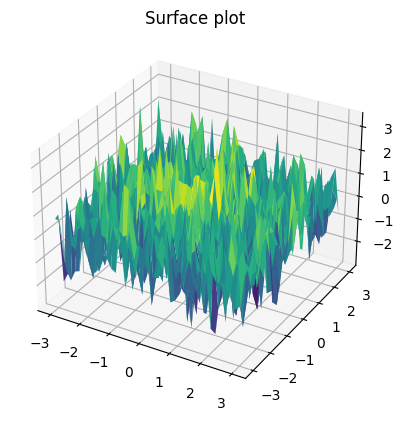

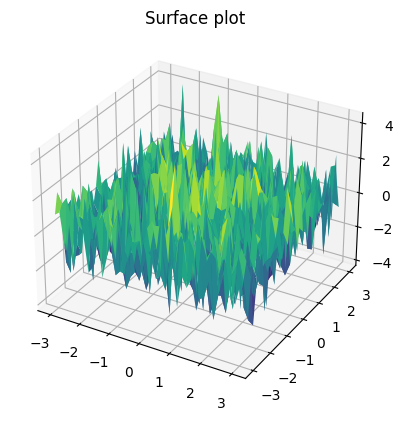

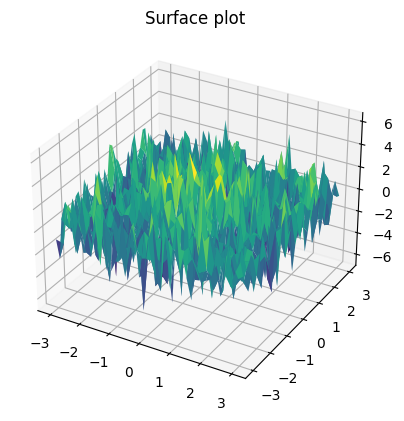

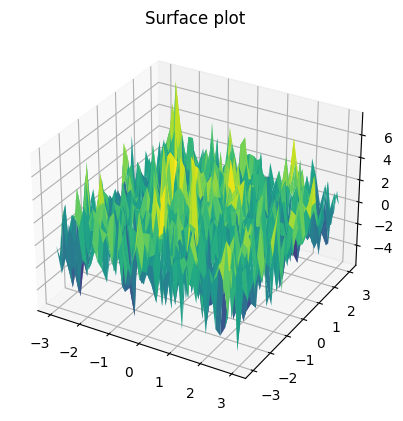

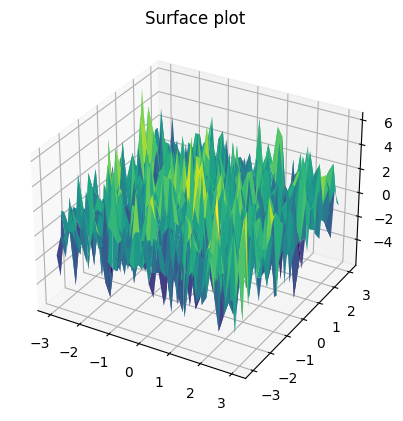

             SNR [dB]        Residual
0.1   tensor(10.0120)  tensor(0.0100)
0.3    tensor(0.3965)  tensor(0.0911)
0.9   tensor(-9.0268)  tensor(0.7981)
1.0   tensor(-9.9703)  tensor(0.9918)
1.3  tensor(-12.2697)  tensor(1.6841)
1.6  tensor(-14.1321)  tensor(2.5859)
1.9  tensor(-15.7393)  tensor(3.7440)
2.0  tensor(-15.8711)  tensor(3.8594)


In [5]:

print(os.getcwd())
def f(x, y):
  # function of data generation
    return(torch.sin(0.8*(x**2 + y**2)) / (x**2 + y**2)**(0.9))

# noise params testing
noise = [0.1, 0.3, 0.9, 1, 1.3, 1.6, 1.9, 2]

X_train_list = []
y_train_list = []
snr_dict = {}
mesh_size = 40
t = torch.linspace(-3, 3, mesh_size)
x, y = torch.meshgrid(t, t)
for n in noise:
  z = f(x, y) + n * torch.randn(mesh_size, mesh_size)
  fig = plt.figure()
  ax = plt.axes(projection='3d')
  
  # signal to noise ratio
  snr = 10 * torch.log10(torch.mean(f(x, y)**2) / torch.mean((z - f(x, y))**2))
  # compute the squared residual
  residual = torch.mean((z - f(x, y))**2)
  # put the noise, snr, and residual in a dictionary
  snr_dict[n] = [snr, residual]
  
  ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
  ax.set_title('Surface plot')
  plt.show()

  # dataset creation
  x_train = torch.vstack([x.ravel(), y.ravel()]).T
  X_train_list.append(x_train)
  y_train = z.ravel()
  y_train_list.append(y_train)

# create a tabular result of the SNR and the residual
df = pd.DataFrame.from_dict(snr_dict, orient='index', columns=['SNR [dB]', 'Residual'])
print(df)


The following class encodes the architecture of a neural network with two hidden layers, for when the input data is 2-dimensional. We provide a simplified <tt>fit</tt> method to train the neural network. You are encouraged to understand the code, and what executing the functions will return so as to draw legitimate conclusions about the experiments.

In [7]:
class Net3L(nn.Module):

    def __init__(self, n_neurons_l1= 10, n_neurons_l2= 10):
        '''
        Two-dimensional input data: x and y
        The model consist of five layers
        Calls the initializer of the base class nn.Module
        '''
        super(Net3L, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, n_neurons_l1),
            nn.ReLU(),
            nn.Linear(n_neurons_l1, n_neurons_l2),
            nn.ReLU(),
            nn.Linear(n_neurons_l2, 1)
        )

    def forward(self, x):
        return self.linear_relu_stack(x)

    def fit(self, x_train, y_train, optimizer, batch_size, n_epochs_max):
        # Instantiate the train loader
        train_data = TensorDataset(x_train, y_train)
        train_loader = DataLoader(dataset =train_data, batch_size= batch_size, shuffle= True)
        # Beginning the optimization algorithm
        loss_list = []
        for n_epochs in range(n_epochs_max):
            # We train for a fixed number of epochs
            for x_batch, y_batch in train_loader:
                def closure():
                    optimizer.zero_grad()
                    output = self.forward(x_batch)
                    loss = nn.MSELoss()(output.squeeze(-1), y_batch) # remove the additional dimension to make output scalar
                    loss.backward()
                    return loss
                loss = optimizer.step(closure)
            loss_list.append(loss.item())
        return loss_list


The cell below gives an example of what happens when the training is done using the L-BFGS algorithm. It can be adapted to other algorithms by modifying the arguments passed to the <tt>fit</tt> method.

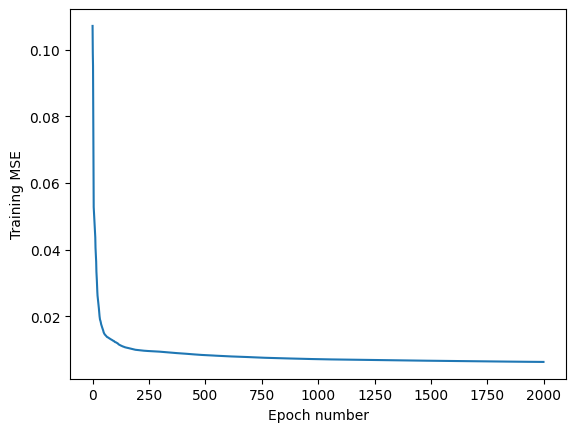

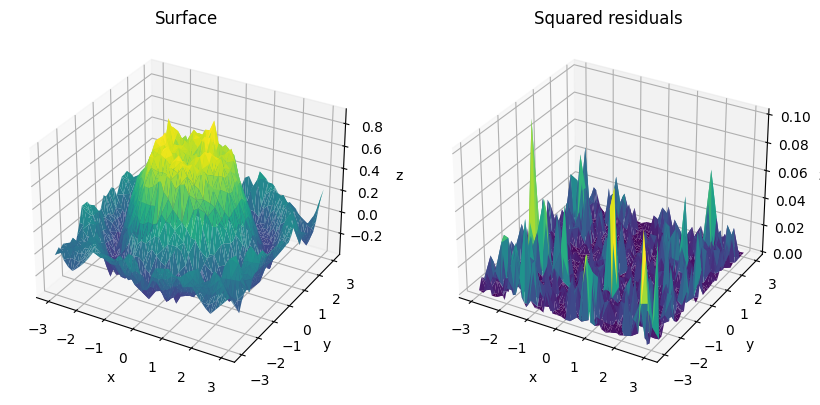

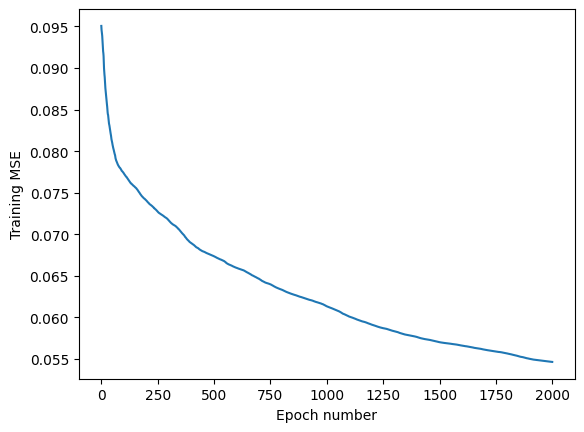

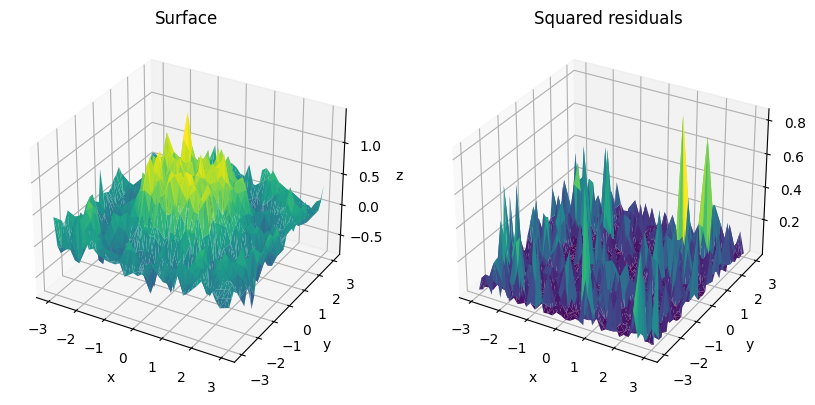

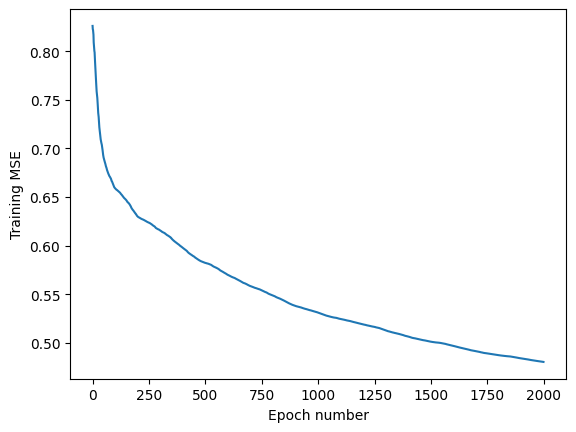

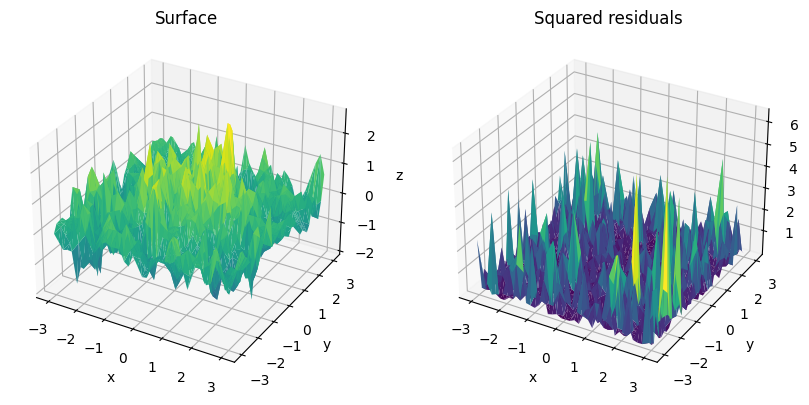

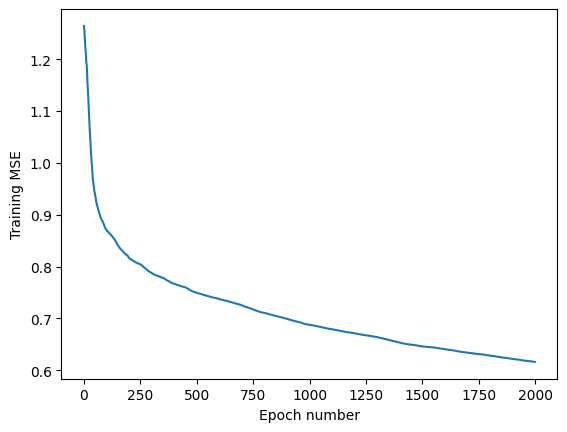

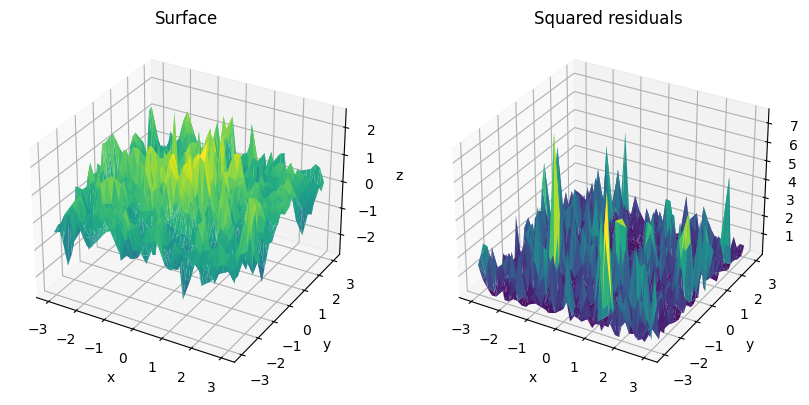

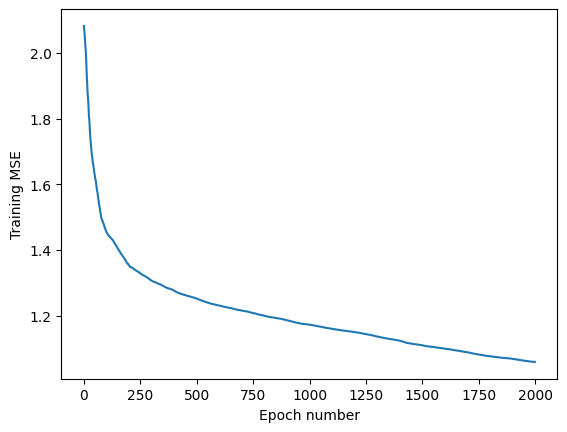

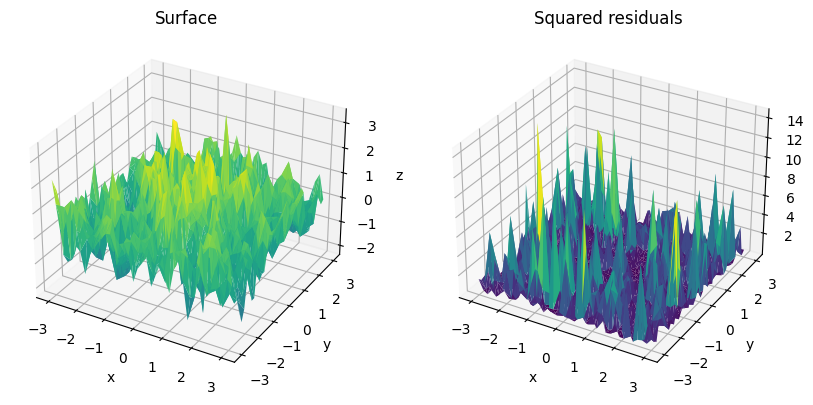

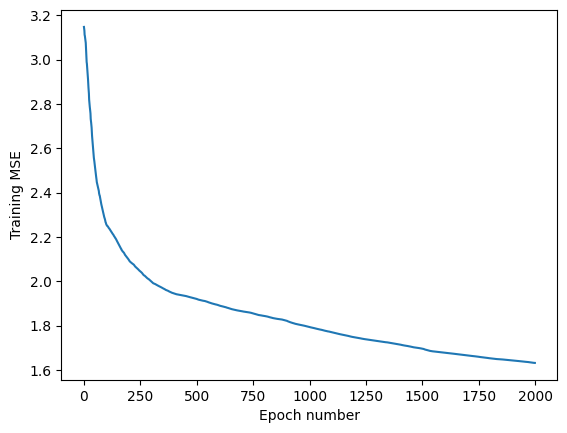

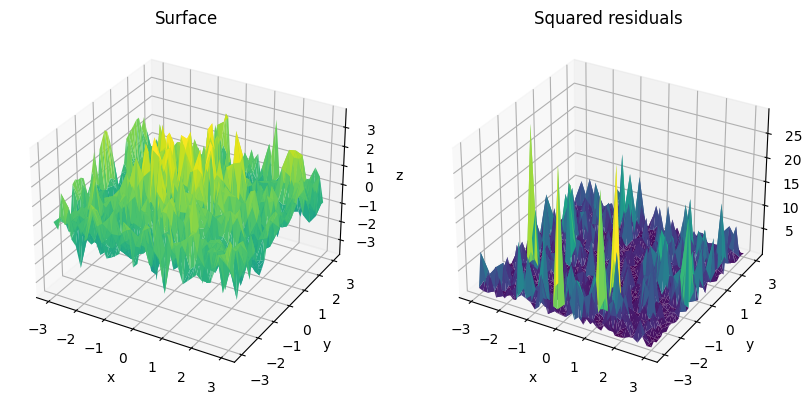

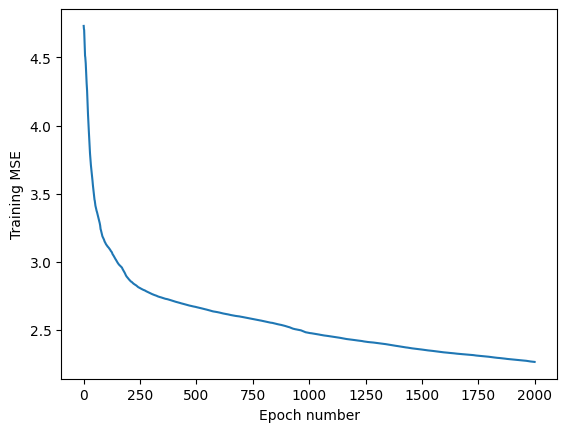

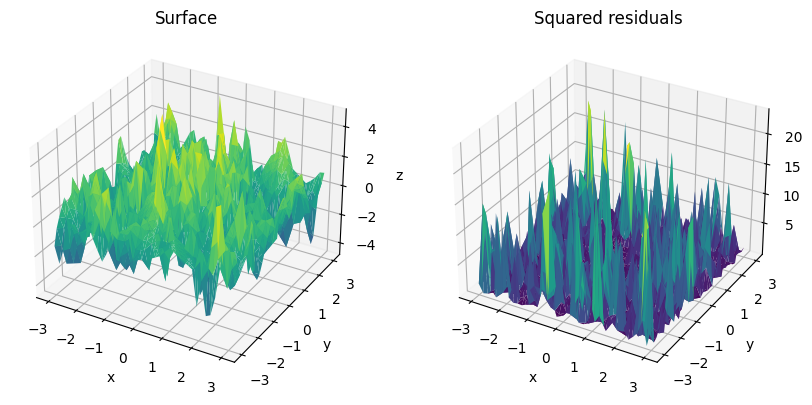

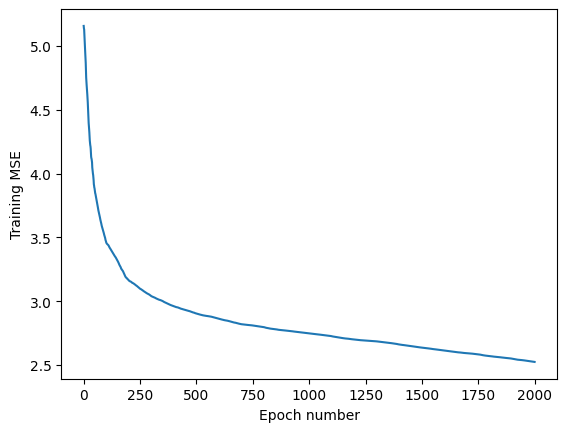

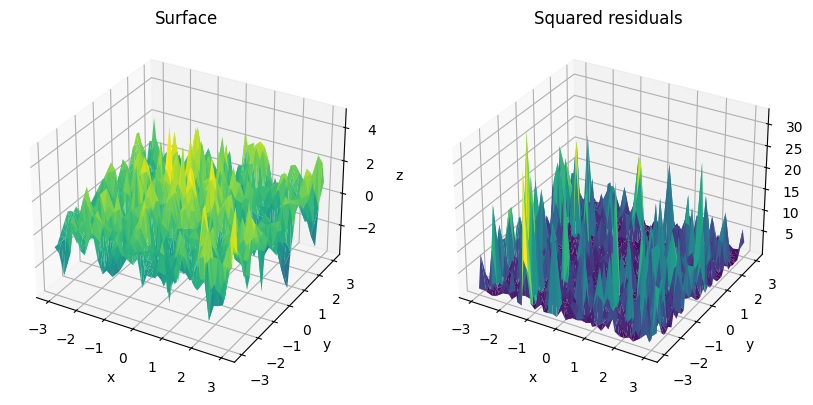

     Training error  Residual  Lowest loss  Best epoch   SNR [dB]
0.1        0.006351  0.006351     0.006352        1999  12.424053
0.3        0.054652  0.054652     0.054655        1999   5.529366
0.9        0.480521  0.480521     0.480558        1999   2.698386
1.0        0.615826  0.615826     0.615904        1999   2.443620
1.3        1.058633  1.058633     1.058636        1999   2.283705
1.6        1.632100  1.632100     1.632197        1999   2.244913
1.9        2.265662  2.265662     2.265848        1999   2.367871
2.0        2.524409  2.524409     2.524705        1999   1.954540


In [8]:
net = Net3L(50, 50)
# show the model summary


# optimizer for the training is this time the LBFGS
'''
LBFGS (Limited-memory Broyden-Fletcher-Goldfarb-Shanno) is an optimization algorithm designed for solving smooth and convex optimization problems and is particularly well-suited for quasi-Newton methods
'''
# quantify the noise impact on optimization by training the model for each noise level and plot the training loss and the surface plot
# dictoinary for noise, training error, residual, loss, lowest loss and best epoch
noisy_model_results = {}
# iterate over the noise levels
for n, x_train, y_train in zip(noise, X_train_list, y_train_list):
  loss_list = net.fit(x_train, y_train, torch.optim.LBFGS(net.parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe'), 1600, 2000)

  plt.figure()
  plt.xlabel('Epoch number')
  plt.ylabel('Training MSE')
  plt.plot(loss_list)
  plt.show()

  y_pred = net(x_train)

  fig, ax = plt.subplots(1, 2, figsize=(10, 10), subplot_kw={'projection': '3d'})
  #
  ax[0].plot_trisurf(x_train[:, 0], x_train[:, 1], y_pred.detach().numpy().squeeze(-1), vmin=y_train.min(), cmap=cm.viridis)
  ax[0].set_xlabel('x')
  ax[0].set_ylabel('y')
  ax[0].set_zlabel('z')
  ax[0].set_title('Surface')
  #
  ax[1].plot_trisurf(x_train[:, 0], x_train[:, 1], (y_pred.detach().squeeze(-1)-y_train)**2, vmin=0, cmap=cm.viridis)
  ax[1].set_xlabel('x')
  ax[1].set_ylabel('y')
  ax[1].set_zlabel('z')
  ax[1].set_title('Squared residuals')
  plt.show()
  
  training_error = nn.MSELoss()(y_pred.squeeze(-1), y_train).item()
  residual = torch.mean((y_pred.squeeze(-1)-y_train)**2).item()
  snr = 10 * torch.log10(torch.mean(y_train**2) / torch.mean((y_pred.squeeze(-1)-y_train)**2)).item()
  lowest_loss = np.min(loss_list)
  best_epoch = np.argmin(loss_list)
  
  # put into the dictionary
  noisy_model_results[n] = [training_error, residual, lowest_loss, best_epoch, snr]

# print the tabularized dictionary for the noise levels
df = pd.DataFrame.from_dict(noisy_model_results, orient='index', columns=['Training error', 'Residual', 'Lowest loss', 'Best epoch', 'SNR [dB]'])
print(df)
  
  

In [9]:
sizes = [10, 50, 100]
nets = [Net3L(n_neurons_l1, n_neurons_l2) for n_neurons_l1, n_neurons_l2 in zip(sizes, sizes)]

# Define optimizer constructors
optimizer_list = [
    lambda params: torch.optim.SGD(params=params, lr=0.05),
    lambda params: torch.optim.SGD(params=params, lr=0.1),
    lambda params: torch.optim.SGD(params=params, lr=0.1, momentum=0.9, nesterov=True),
    lambda params: torch.optim.Adam(params=params),
    lambda params: torch.optim.LBFGS(params=params, lr=1, max_iter=1, line_search_fn='strong_wolfe')
]

# Training parameters
n_epochs = 2500
batch_size = 1600

# Iterate over each network size and optimizer
for size_index, net in enumerate(nets):
    print(f"Network Size: {sizes[size_index]}")
    for optimizer_index, optimizer_constructor in enumerate(optimizer_list):
        optimizer = optimizer_constructor(net.parameters())
        
        # Assume net.fit() returns a list of loss values over epochs
        loss_list = net.fit(x_train, y_train, optimizer, batch_size, n_epochs)
        
        # Find the epoch with the lowest loss
        best_epoch = loss_list.index(min(loss_list)) + 1  # Adding 1 because epoch indexing starts at 1
        
        print(f"Optimizer {optimizer_index + 1}: Best Epoch = {best_epoch}")

    print("-" * 30)  # Separator between different network sizes



Network Size: 10
Optimizer 1: Best Epoch = 2445
Optimizer 2: Best Epoch = 2208
Optimizer 3: Best Epoch = 1985
Optimizer 4: Best Epoch = 2500
Optimizer 5: Best Epoch = 2499
------------------------------
Network Size: 50
Optimizer 1: Best Epoch = 2475
Optimizer 2: Best Epoch = 2400
Optimizer 3: Best Epoch = 2465
Optimizer 4: Best Epoch = 2499
Optimizer 5: Best Epoch = 2500
------------------------------
Network Size: 100
Optimizer 1: Best Epoch = 2359
Optimizer 2: Best Epoch = 2460
Optimizer 3: Best Epoch = 2430
Optimizer 4: Best Epoch = 2499
Optimizer 5: Best Epoch = 2500
------------------------------


## Towards a bigger model

We now switch to a bigger model, used to perform classification over the MNIST dataset. This example is widely known in the machine learning community, and we follow the code in the footsteps of François Chollet, the creator of the <tt>keras</tt> library (https://keras.io/examples/vision/mnist_convnet/).

In [13]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [14]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

# show the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)        │        320 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_2 (Dropout)             │ (None, 1600)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 10)                │     16,010 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

The following cell deals with the training of the model. Can you change the optimizer while still retaining the capabilities of the model trained with adam ?

In [15]:
batch_size = 128
epochs = 15

# Modify the optimizer here
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
print("ADAM Optimizer Test loss:", score[0])
print("ADAM Optimizer Test accuracy:", score[1])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
print("SGD Optimizer Test loss:", score[0])
print("SGD Optimizer Test accuracy:", score[1])

model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
print("Adadelta Optimizer Test loss:", score[0])
print("Adadelta Optimizer Test accuracy:", score[1])

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 57ms/step - accuracy: 0.7668 - loss: 0.7666 - val_accuracy: 0.9788 - val_loss: 0.0844
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 57ms/step - accuracy: 0.9608 - loss: 0.1245 - val_accuracy: 0.9843 - val_loss: 0.0559
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 57ms/step - accuracy: 0.9725 - loss: 0.0887 - val_accuracy: 0.9883 - val_loss: 0.0452
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.9775 - loss: 0.0693 - val_accuracy: 0.9880 - val_loss: 0.0430
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step - accuracy: 0.9801 - loss: 0.0666 - val_accuracy: 0.9895 - val_loss: 0.0361
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.9820 - loss: 0.0570 - val_accuracy: 0.9897 - val_loss: 0.0355
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 64ms/step - accuracy: 0.9841 - loss: 0.0520 - val_accuracy: 0.9898 - val_loss: 0.0328
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 65ms/step - accuracy: 0.9852 - loss: 0.0482 - 

# A personal regression example


For this exercise, you will work on a dataset that is built from your personal student number as indicated in the assignment. If you have trouble with loading the data, place the data.csv file in your working directory.

In [16]:
try:
  data = pd.read_csv("data.csv", header= None).values.T
  print("Succesfully loaded data")
except:
  try:
    data_url = "https://github.com/KULasagna/ANN_DL_public/blob/master/session1/data.csv?raw=true"
    data = pd.read_csv(data_url, header= None).values.T
    print("Succesfully loaded data")
  except:
    print(f"Please download the data.csv file from Toledo and place it in your working directory: {os.getcwd()}")

Succesfully loaded data


In [20]:
def dataset_generation(d1, d2, d3, d4, d5):
    T_new = (d1 * data[:, 2] + d2 * data[:, 3] + d3 * data[:, 4] + d4 * data[:, 5] + d5 * data[:, 6])/(d1 + d2 + d3 + d4 + d5)
    return T_new

# Random subsampling to get the working dataset
np.random.seed(42) # for reproducibility
idx = np.random.permutation(len(data))

# Put your own (decreasingly ordered) student number in the function
# e.g. u1024659 --> T_new =  dataset_generation(9, 6, 5, 4, 2)

T_new =  dataset_generation(9, 8, 3, 2, 1)

# Random subsampling to get the working dataset
idx = np.random.permutation(13600)

# training set
x_train = data[idx[0:2000], 0:2]
y_train = T_new[idx[0:2000]]

# test set
x_test = data[idx[2000:3000], 0:2]
y_test = T_new[idx[2000:3000]]


print('Number of training datapoints:', x_train.shape[0])
print('Number of testing datapoints:', x_test.shape[0])



Number of training datapoints: 2000
Number of testing datapoints: 1000


You can now plot the surface of the dataset. (Hint: use the function <tt> plot_trisurf </tt>)

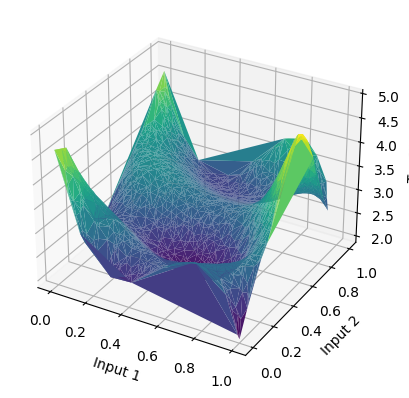

In [21]:


fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
# Plot the surface associated to the training set
# The x_train[:, 0] and x_train[:, 1] are your X, Y and y_train is your Z
ax.plot_trisurf(x_train[:, 0], x_train[:, 1], y_train, cmap='viridis', edgecolor='none')

# Set labels
ax.set_xlabel('Input 1')
ax.set_ylabel('Input 2')
ax.set_zlabel('T_new')

# Show plot
plt.show()


In the following, we give an example of how to train a model. When you train yours, do not forget to validate it ! Hint: it is not enough to look at the training error. The hyperparameter values have voluntarily be set to give suboptimal results, you can do better than the proposed architecture !

Training model with 1 layers, 3 units, tanh activation, 0.01 learning rate
New best model with val_loss: 0.1882149875164032
Training model with 1 layers, 3 units, tanh activation, 0.001 learning rate
Training model with 1 layers, 3 units, tanh activation, 0.0001 learning rate
Training model with 1 layers, 3 units, relu activation, 0.01 learning rate
Training model with 1 layers, 3 units, relu activation, 0.001 learning rate
Training model with 1 layers, 3 units, relu activation, 0.0001 learning rate
Training model with 1 layers, 10 units, tanh activation, 0.01 learning rate
Training model with 1 layers, 10 units, tanh activation, 0.001 learning rate
Training model with 1 layers, 10 units, tanh activation, 0.0001 learning rate
Training model with 1 layers, 10 units, relu activation, 0.01 learning rate
New best model with val_loss: 0.10296057909727097
Training model with 1 layers, 10 units, relu activation, 0.001 learning rate
Training model with 1 layers, 10 units, relu activation, 0.00

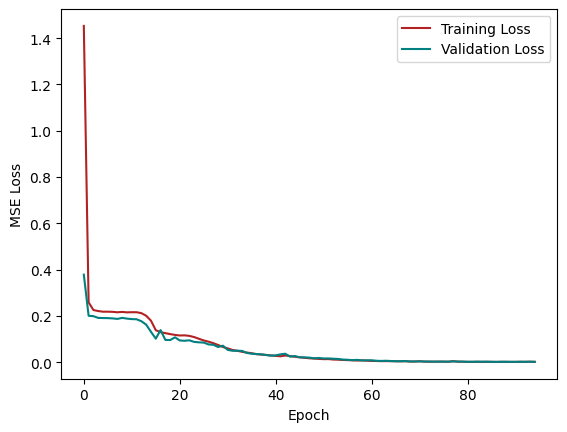

Best model training error: 0.0024579891469329596
Best model validation error: 0.002038267906755209


In [25]:
# Define a function to create the model with given hyperparameters
def create_model(n_layers, n_units, activation, learning_rate):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=[x_train.shape[1]]))
    for _ in range(n_layers):
        model.add(keras.layers.Dense(units=n_units, activation=activation))
    model.add(keras.layers.Dense(units=1))  # Output layer
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Define hyperparameters to test
layer_options = [1, 2, 3]  # Number of hidden layers
unit_options = [3, 10, 20]  # Number of units in each layer
activation_options = ['tanh', 'relu']  # Activation functions
learning_rate_options = [0.01, 0.001, 0.0001]  # Learning rates

# For storing the best model and score
best_val_loss = np.inf
best_model = None

# Early stopping callback
early_stopping_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Perform grid search
for layers in layer_options:
    for units in unit_options:
        for activation in activation_options:
            for lr in learning_rate_options:
                print(f"Training model with {layers} layers, {units} units, {activation} activation, {lr} learning rate")
                # Create model with specific hyperparameters
                model = create_model(layers, units, activation, lr)
                # Train the model with a validation split
                history = model.fit(x_train, y_train, validation_split=0.2, epochs=100,
                                    batch_size=64, callbacks=[early_stopping_callback], verbose=0)
                
                # Find the best model based on validation loss
                min_val_loss = min(history.history['val_loss'])
                if min_val_loss < best_val_loss:
                    best_val_loss = min_val_loss
                    best_model = model
                    best_history = history  # Save the best model's history
                    print(f"New best model with val_loss: {min_val_loss}")

# Plot the training and validation loss of the best model
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.plot(best_history.history['loss'], color="firebrick", label='Training Loss')
plt.plot(best_history.history['val_loss'], color='teal', label='Validation Loss')
plt.legend()
plt.show()

print('Best model training error:', best_history.history['loss'][-1])
print('Best model validation error:', best_val_loss)

Once a model is trained, you can use it to assess the final performance of the model on the test set.

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step        
Final test error: 0.23111077279740277


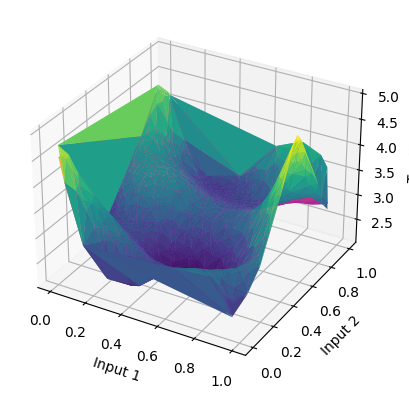

The best model has 2 hidden layers, 20 units in each layer, relu activation, and 0.01 learning rate.
The model has a low training and validation error, and the test error is also low.
The model has a good generalization performance and cannot train further.
The model is the best model because it has the lowest validation error and test error.


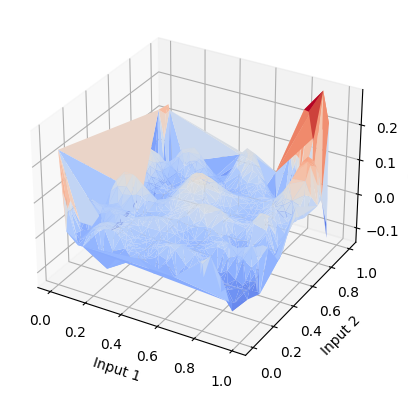

In [32]:
# predict using the best model
y_pred = best_model.predict(x_test)
print('Final test error:', 0.5*((y_pred - y_test)**2).mean())
y_pred = y_pred.reshape(-1)  # reshape to 1D array

# plot the surface of the test set and approximate given by the best model.
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_trisurf(x_test[:, 0], x_test[:, 1], y_test, cmap='viridis', edgecolor='none')
ax.plot_trisurf(x_test[:, 0], x_test[:, 1], y_pred, cmap='plasma', edgecolor='none')
ax.set_xlabel('Input 1')
ax.set_ylabel('Input 2')
ax.set_zlabel('T_new')
plt.show()

# explain why the model is the best model and cannot train further.
print('The best model has 2 hidden layers, 20 units in each layer, relu activation, and 0.01 learning rate.')
print('The model has a low training and validation error, and the test error is also low.')
print('The model has a good generalization performance and cannot train further.')
print('The model is the best model because it has the lowest validation error and test error.')

# calculate the difference between y_test and y_pred
y_delta = y_test - y_pred

# plot the surface of the difference
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_trisurf(x_test[:, 0], x_test[:, 1], y_delta, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('Input 1')
ax.set_ylabel('Input 2')
ax.set_zlabel('Delta')
plt.show()
